In [1]:
df<-read.csv('d:/data/soccer/player.csv')
head(df)

id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0
6,Aaron Hunt,1986-09-04,left,33,183,161,76,0,1,...,76,75,78,14,7,9,9,12,74,1


In [2]:
library(dplyr)
df<-df %>% select(-id, -player_name,-birthday,-preferred_foot,-overall_rating)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 10935    40

age,height,weight,potential,right_foot,left_foot,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Label
27,183,187,71,1,0,49,44,71,61,...,48,65,69,69,6,11,10,8,8,0
30,170,146,71,1,0,49,44,71,61,...,48,65,69,69,6,11,10,8,8,0
28,170,163,66,1,0,49,44,71,61,...,48,65,66,69,6,11,10,8,8,0
37,183,198,65,1,0,48,43,70,60,...,47,62,63,66,5,10,9,7,7,0
40,183,154,65,1,0,48,43,70,60,...,47,62,63,66,5,10,9,7,7,0
33,183,161,76,0,1,80,53,58,71,...,59,76,75,78,14,7,9,9,12,1



   0    1 
5230 5705 

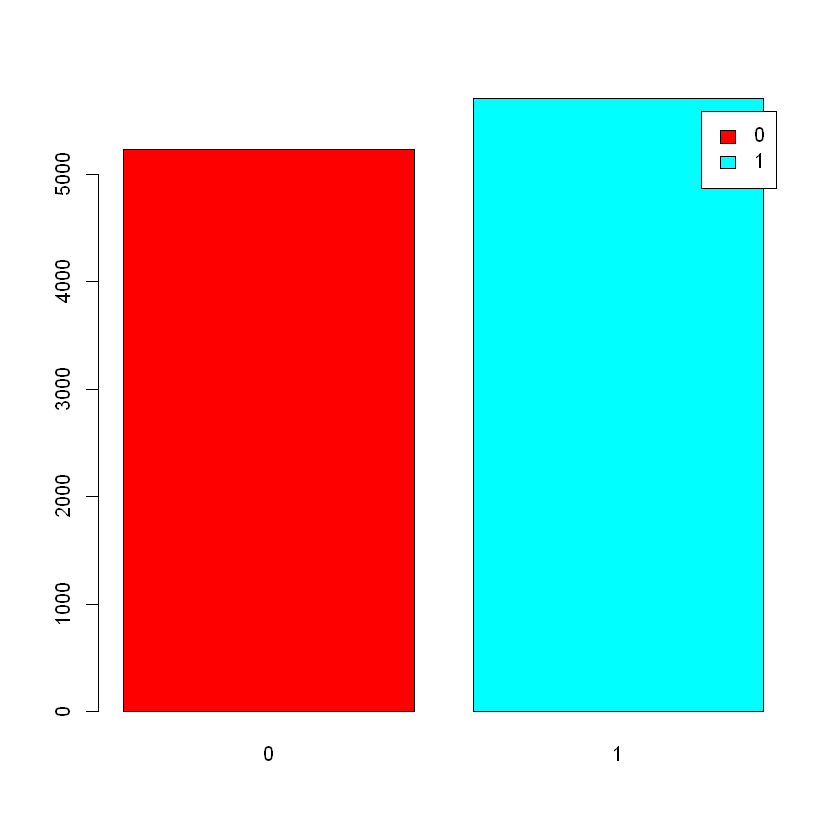

In [3]:
(tbl<-table(df$Label))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [4]:
#언더샘플링
library(ROSE)
df_samp<-ovun.sample(Label ~ . , data=df, seed=1, method='under',
                    N=5230*2)$data
table(df_samp$Label)

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




   0    1 
5230 5230 

In [5]:
#학습용:검증용 8:2 구분
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$Label, p=0.8, list=F)
train<-df_samp[idx_train,]
X_train<-train[,-40]
y_train<-train[,40]
test<-df_samp[-idx_train,]
X_test<-test[,-40]
y_test<-test[,40]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


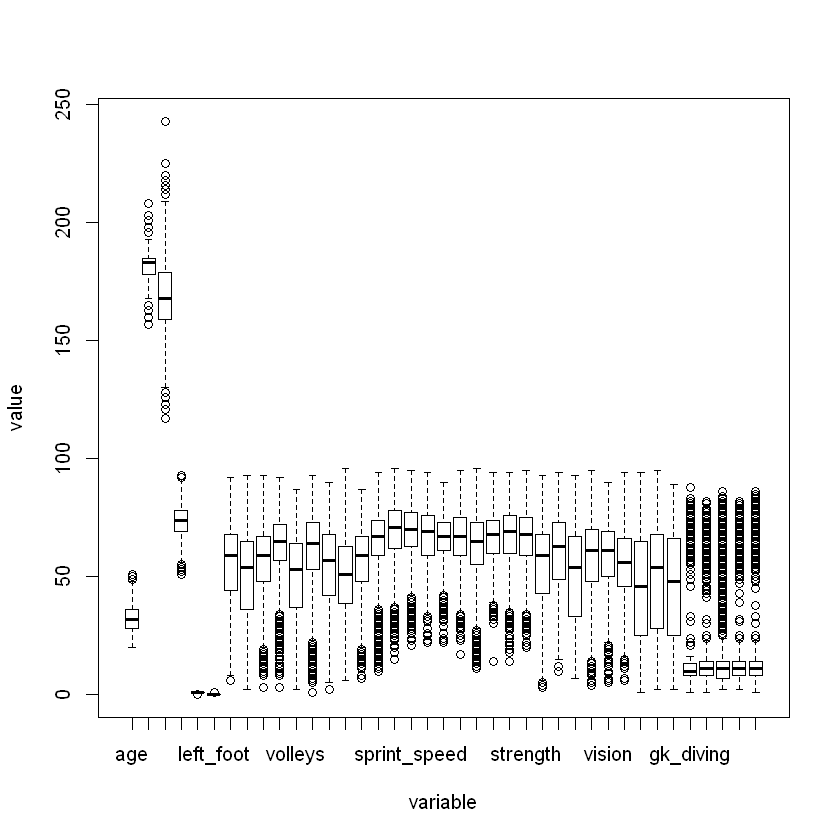

In [6]:
library(reshape)
#scaling 전의 박스플롯
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [7]:
#scale() 변수들의 평균,표준편차들 비슷하게 맞추고 데이터프레임으로 변환
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
#스케일링된 독립변수들과 종속변수 연결
train_scaled<-cbind(X_train_scaled,Label=y_train)
test_scaled<-cbind(X_test_scaled,Label=y_test)

Using  as id variables


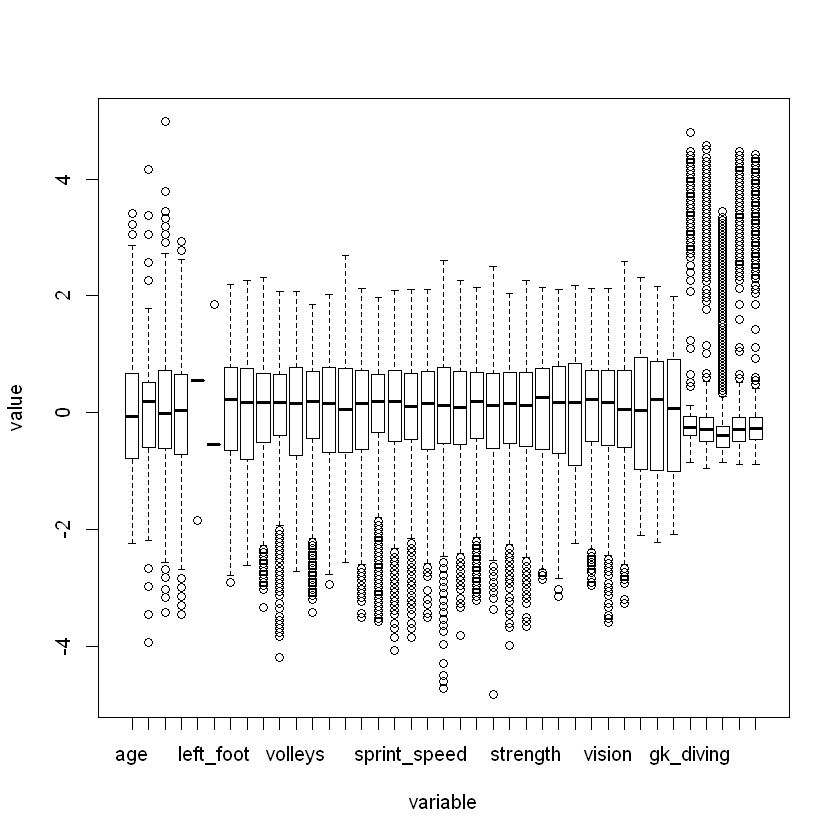

In [8]:
#scaling 후의 박스플롯
meltData<-melt(X_train_scaled)
boxplot(data=meltData,value~variable)

In [9]:
#로지스틱 회귀분석 모형
model<-glm(Label ~ . , data=train_scaled, family=binomial)
summary(model)


Call:
glm(formula = Label ~ ., family = binomial, data = train_scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2104  -0.2405   0.0004   0.2444   3.5104  

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.14918    0.04255  -3.506 0.000455 ***
age                -0.02232    0.04195  -0.532 0.594653    
height             -0.03815    0.06388  -0.597 0.550426    
weight              0.06859    0.06497   1.056 0.291100    
potential           1.88091    0.07382  25.478  < 2e-16 ***
right_foot          0.08062    0.04239   1.902 0.057212 .  
left_foot                NA         NA      NA       NA    
crossing            0.26013    0.09301   2.797 0.005160 ** 
finishing           0.29694    0.11409   2.603 0.009248 ** 
heading_accuracy    0.95502    0.08600  11.105  < 2e-16 ***
short_passing       0.26581    0.13378   1.987 0.046929 *  
volleys            -0.28084    0.09723

In [10]:
#후진제거법
reduced<-step(model,direction='backward')

Start:  AIC=3989.61
Label ~ age + height + weight + potential + right_foot + left_foot + 
    crossing + finishing + heading_accuracy + short_passing + 
    volleys + dribbling + curve + free_kick_accuracy + long_passing + 
    ball_control + acceleration + sprint_speed + agility + reactions + 
    balance + shot_power + jumping + stamina + strength + long_shots + 
    aggression + interceptions + positioning + vision + penalties + 
    marking + standing_tackle + sliding_tackle + gk_diving + 
    gk_handling + gk_kicking + gk_positioning + gk_reflexes


Step:  AIC=3989.61
Label ~ age + height + weight + potential + right_foot + crossing + 
    finishing + heading_accuracy + short_passing + volleys + 
    dribbling + curve + free_kick_accuracy + long_passing + ball_control + 
    acceleration + sprint_speed + agility + reactions + balance + 
    shot_power + jumping + stamina + strength + long_shots + 
    aggression + interceptions + positioning + vision + penalties + 
    marking + s

In [11]:
#인공신경망 모형 생성
library(nnet)
model<-nnet(Label ~ age + height + weight + potential + right_foot + crossing + 
    finishing + heading_accuracy + short_passing + volleys + 
    dribbling + curve + free_kick_accuracy + long_passing + ball_control + 
    acceleration + sprint_speed + agility + reactions + balance + 
    shot_power + jumping + stamina + strength + long_shots + 
    aggression + interceptions + positioning + vision + penalties + 
    marking + standing_tackle + sliding_tackle + gk_diving + 
    gk_handling + gk_kicking + gk_positioning + gk_reflexes  , data=train_scaled, size=10)
summary(model)

# weights:  401
initial  value 2216.927489 
iter  10 value 1762.928237
iter  20 value 1395.690705
iter  30 value 1308.876070
iter  40 value 1215.717268
iter  50 value 1159.767005
iter  60 value 1141.926349
iter  70 value 1125.255953
iter  80 value 1118.500270
iter  90 value 1113.377683
iter 100 value 1109.072542
final  value 1109.072542 
stopped after 100 iterations


a 38-10-1 network with 401 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.18    0.59    0.46   -0.33   -0.04   -0.33   -0.53   -0.01   -0.03   -0.47 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.48    0.48    0.42   -0.17    0.23    0.52    0.10    0.33    0.25    0.40 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
   0.07   -0.60   -0.24   -0.64    0.41    0.03    0.23   -0.20    0.68   -0.19 
i30->h1 i31->h1 i32->h1 i33->h1 i34->h1 i35->h1 i36->h1 i37->h1 i38->h1 
   0.14   -0.06    0.10    0.62    0.57   -0.25   -0.56   -0.32    0.47 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.63   -0.54    0.12    0.49    0.13    0.28   -0.56    0.27    0.38   -0.65 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.53   -0.53    0.37    0.67   -0.52   -0.01    0.60   -0.63   -0.16   -

Warning message:
"package 'devtools' was built under R version 3.6.2"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.2"SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d
Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.6.2"

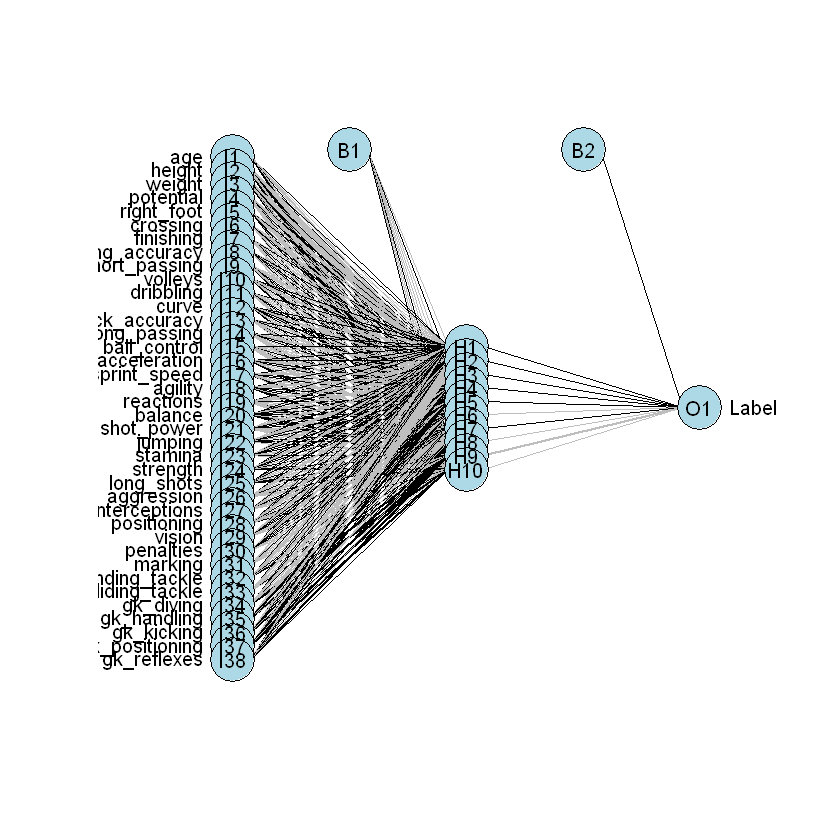

In [12]:
#인공신경망 그래프
library(devtools)

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

plot.nnet(model)

Warning message:
"package 'NeuralNetTools' was built under R version 3.6.2"

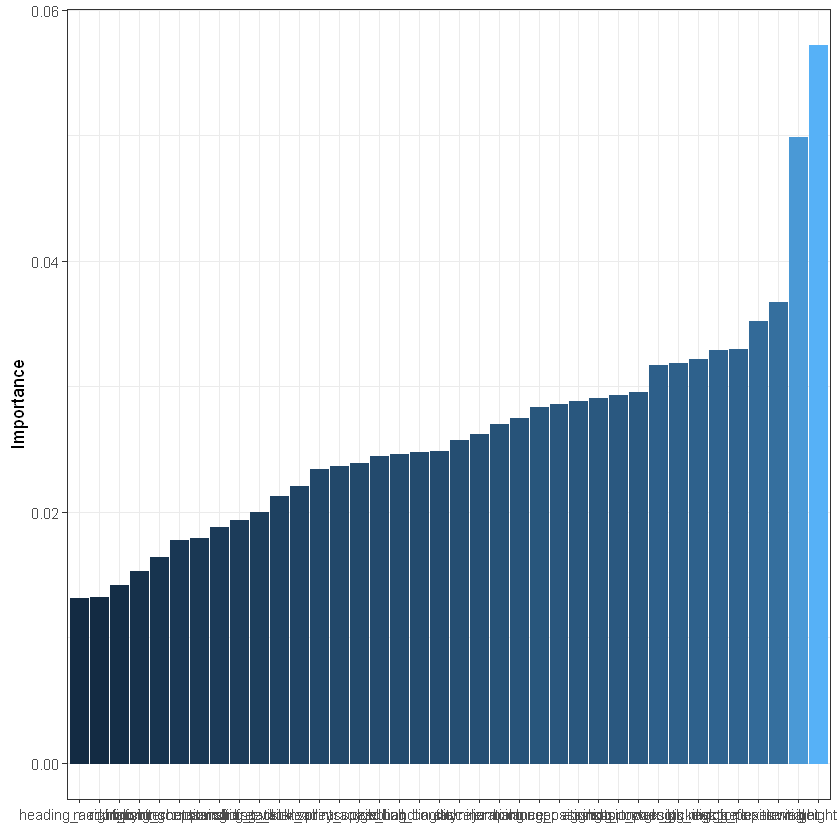

In [13]:
library(NeuralNetTools)
garson(model)#변수 중요도 그래프

In [14]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train_scaled)
result<-round(pred)
table(y_train,result)
mean(y_train == result)

       result
y_train    0    1
      0 3118 1066
      1 1465 2719

[1] 0.6975382

In [15]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test_scaled)
result<-round(pred)
table(y_test,result)
mean(y_test == result)

      result
y_test   0   1
     0 790 256
     1 375 671

[1] 0.6983748